In [1]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib notebook

from IPython.display import display
import ipywidgets as widgets
from ipywidgets import interact, FloatSlider, IntSlider

In [2]:
def decay_cycle(N_t,N,N_d,P,data):
	for i in range(1,N_t+1):
		rand = np.random.rand(N)
		for j in range(N):
			for k in range(N_d):
				if rand[j] < P[k]:
					if data[j,i] < N_d:                    
						data[j,i:] = data[j,i:] + 1.0
						break
	return data

In [3]:
def counter(N_t,N_d,data):
	# Counted nucleii
	count = np.zeros((N_d,N_t+1))
	for i in range(N_d):
		count[i,:] = np.sum(data.astype('int64') == i,axis = 0)
	return count

In [4]:
global N,N_t,N_d

# Number of nucleii
N = 100000

# Number of daughters in chain
N_d = 4

# Probability of each decay
P = np.zeros((N_d))
P[0] = 0.25
P[1] = 0.025
P[2] = 0.075
P[3] = 0.0001

# Number of time steps
N_t = 25

def N_update(val):
    global N
    N = val

def N_t_update(val):
    global N_t
    N_t = val

def N_d_update(val):
    global N_d
    N_d = val

def main(event):
    plt.clf()
    # Data record array
    initial_state = np.zeros((N,N_t+1))

    data = decay_cycle(N_t,N,N_d,P,initial_state)

    count = counter(N_t,N_d,data)

    time = np.arange(0,N_t+1)
    stable = np.sum(count, axis = 0)
    for i in range(N_d):
        plt.plot(time,count[i,:])
    plt.plot(time,N-stable)

    plt.show()

<IPython.core.display.Javascript object>


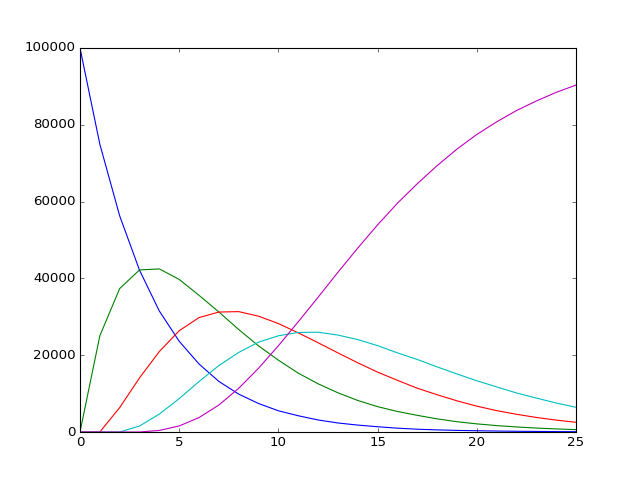

In [5]:
widgets.interact(N_update,val = IntSlider(min=10, max=100000, step=1, value=N, description='Number of Nucleii'))
widgets.interact(N_t_update,val = IntSlider(min=1, max=100, step=1, value=N_t, description='Number of Time Steps'))
#widgets.interact(N_d_update,val = IntSlider(min=1, max=6, step=1, value=N_d, description='Length of Decay Chain'))

run_button = widgets.Button(description="Run")
display(run_button)
run_button.on_click(main)